In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the dataset
data = pd.read_csv('C:/Users/shaje/OneDrive/Documents/NCL Internship/3_2023_113.csv')

In [3]:
# Dropping columns with high percentage of missing values (threshold: 50%)
missing_values = data.isnull().sum()
missing_threshold = 0.5 * len(data)
columns_to_drop = missing_values[missing_values > missing_threshold].index
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

In [4]:
# Filling remaining missing values with mean for numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].mean())

In [5]:
# Dropping irrelevant columns
irrelevant_columns = ['bulk_id', 'car_reg_no', 'time_stamp', 'latitude', 'longitude']
data_cleaned = data_cleaned.drop(columns=[col for col in irrelevant_columns if col in data_cleaned.columns], axis=1)

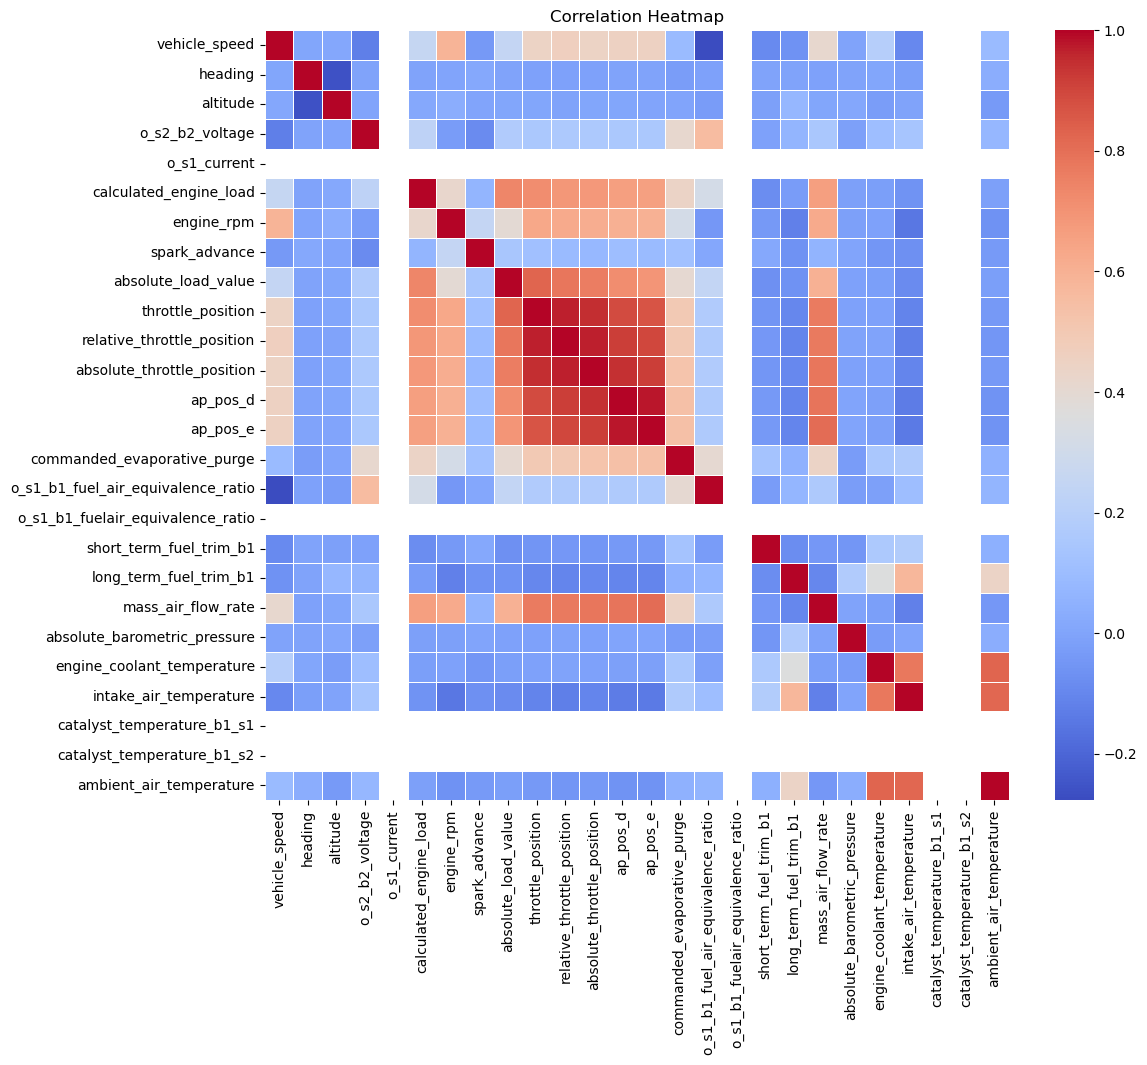

In [19]:
# EDA: Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

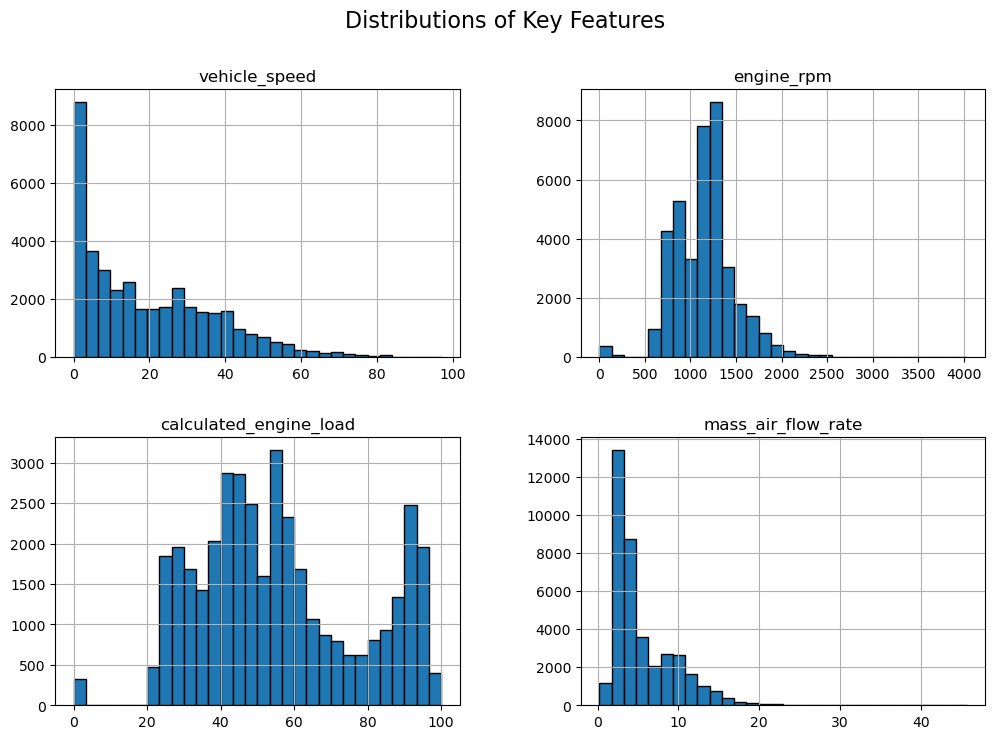

In [20]:
# EDA: Distributions of key numerical features
key_features = ['vehicle_speed', 'engine_rpm', 'calculated_engine_load', 'mass_air_flow_rate']
data_cleaned[key_features].hist(bins=30, figsize=(12, 8), layout=(2, 2), edgecolor='k')
plt.suptitle('Distributions of Key Features', fontsize=16)
plt.show()

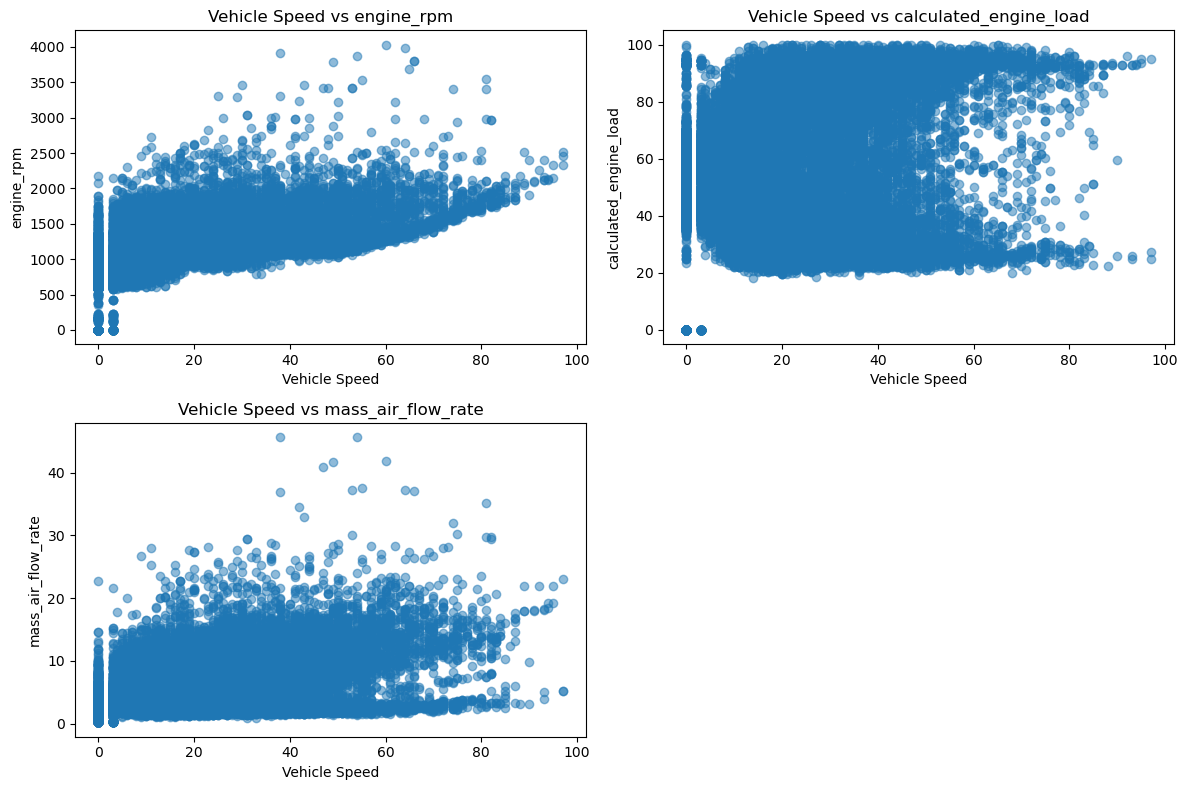

In [21]:
# EDA: Scatter plots for relationships between key features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features[1:], start=1):  # Skip the first feature for comparison
    plt.subplot(2, 2, i)
    plt.scatter(data_cleaned['vehicle_speed'], data_cleaned[feature], alpha=0.5)
    plt.title(f'Vehicle Speed vs {feature}')
    plt.xlabel('Vehicle Speed')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [6]:
# Define target and features
target = 'vehicle_speed'
X = data_cleaned.drop(columns=[target])
y = data_cleaned[target]

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

In [10]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

In [11]:
# Print model performance
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R^2 Score:", lr_r2)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R^2 Score:", rf_r2)

Linear Regression RMSE: 11.639005087943088
Linear Regression R^2 Score: 0.5729324262135953
Random Forest RMSE: 7.226676600769676
Random Forest R^2 Score: 0.8353574355583984


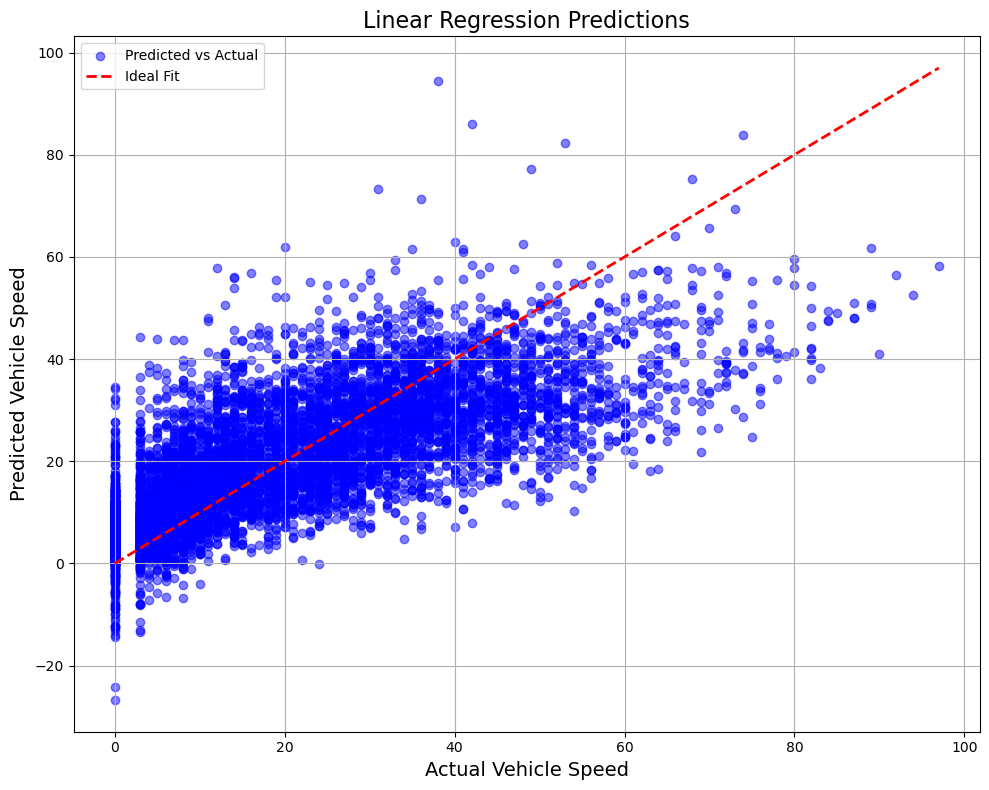

In [25]:
# Linear Regression Predictions
plt.figure(figsize=(10, 8))  # Set a larger figure size
plt.scatter(y_test, lr_predictions, alpha=0.5, label='Predicted vs Actual', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit', linewidth=2)
plt.title('Linear Regression Predictions', fontsize=16)
plt.xlabel('Actual Vehicle Speed', fontsize=14)
plt.ylabel('Predicted Vehicle Speed', fontsize=14)
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()

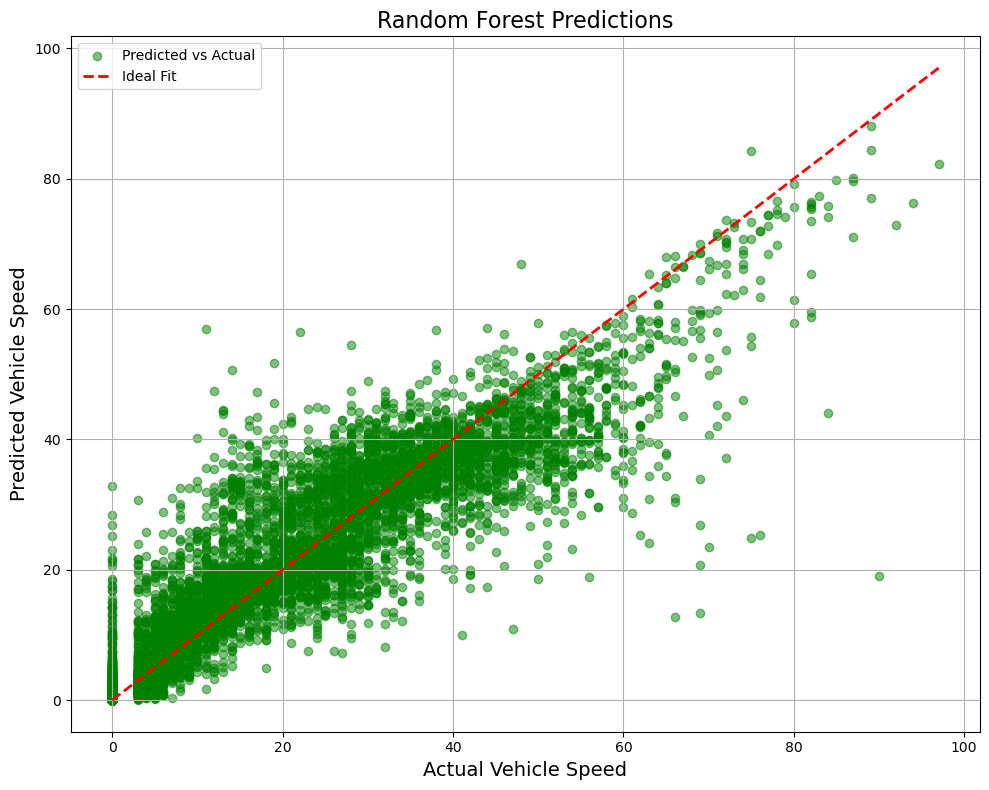

In [26]:
# Random Forest Predictions
plt.figure(figsize=(10, 8))  # Set a larger figure size
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Predicted vs Actual', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit', linewidth=2)
plt.title('Random Forest Predictions', fontsize=16)
plt.xlabel('Actual Vehicle Speed', fontsize=14)
plt.ylabel('Predicted Vehicle Speed', fontsize=14)
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()

In [18]:
# Calculate accuracy
print("Linear Regression Accuracy:", lr_r2 * 100, "%")
print("Random Forest Accuracy:", rf_r2 * 100, "%")

Linear Regression Accuracy: 57.29324262135953 %
Random Forest Accuracy: 83.53574355583984 %
